In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Afia CSE422 Lab Project/Maternal Health Risk Data Set.csv')
data.head(3)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk


## Dataset Description

In [ ]:
data.shape

(1014, 7)

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
print(f'There are {data.shape[1]-1} features in the dataset.')
print(f'Multiclass classification problem. Because we are predicting 3 types of risks from the features.')
print(f'There are {data.size} data points')
print(set(data.dtypes))
print("The input features in the dataset are Quantitative and output feature is Categorical.")

There are 6 features in the dataset.
Multiclass classification problem. Because we are predicting 3 types of risks from the features.
There are 7098 data points
{dtype('float64'), dtype('int64'), dtype('O')}
The input features in the dataset are Quantitative and output feature is Categorical.


In [ ]:
features= data.drop('RiskLevel',axis=1).columns.to_list()
data_corr=data[features].corr()
data_corr

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


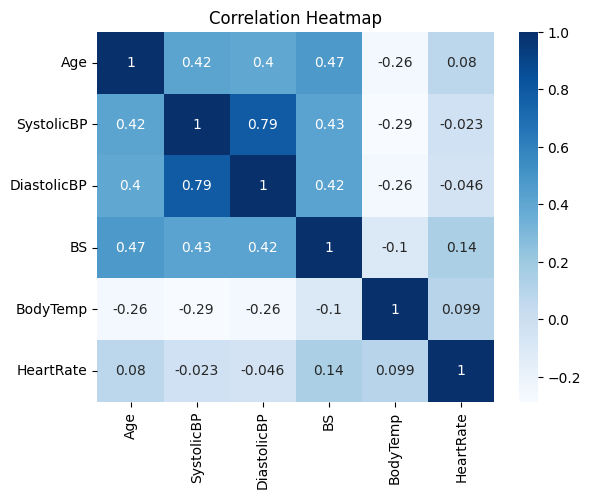

In [ ]:
import seaborn as sns
sns.heatmap(data_corr, annot = True, cmap = 'Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(data['RiskLevel'].value_counts())
print("For the output feature all unique classes does not have equal number of instances.")

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64
For the output feature all unique classes does not have equal number of instances.


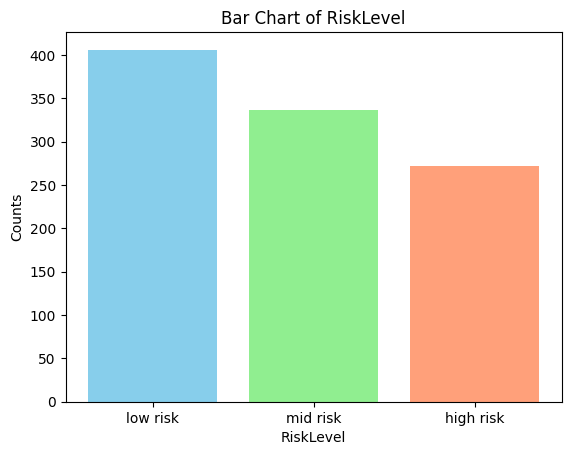

In [ ]:
labels= ['low risk','mid risk','high risk']
values= [406, 336, 272]

plt.bar(labels, values, color=['skyblue', 'lightgreen', 'lightsalmon'])
plt.xlabel('RiskLevel')
plt.ylabel('Counts')
plt.title('Bar Chart of RiskLevel')
plt.show()

## Dataset Pre-processing

In [ ]:
data.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
null_rows=data.isnull().any(axis=1).sum()
print(null_rows)

0


In [ ]:
non_numeric_cols= data.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_cols)

['RiskLevel']


In [ ]:
data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
risk_mapping = {
    'low risk': 0,
    'mid risk': 1,
    'high risk': 2}

data['RiskLevel'] = data['RiskLevel'].map(risk_mapping)

In [ ]:
print(data.dtypes)
data.head(10)

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel        int64
dtype: object


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,2
1,35,140,90,13.00,98.0,70,2
2,29,90,70,8.00,100.0,80,2
3,30,140,85,7.00,98.0,70,2
4,35,120,60,6.10,98.0,76,0
5,23,140,80,7.01,98.0,70,2
6,23,130,70,7.01,98.0,78,1
7,35,85,60,11.00,102.0,86,2
8,32,120,90,6.90,98.0,70,1
9,42,130,80,18.00,98.0,70,2


In [ ]:
data_corr=data.corr()
print("Correlation Matrix:")
data_corr

Correlation Matrix:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


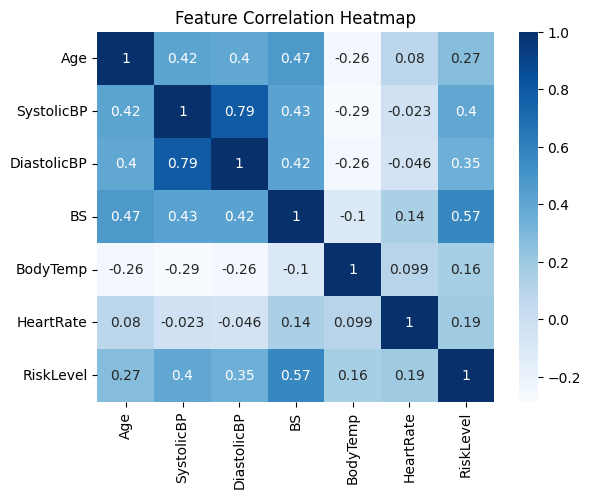

In [ ]:
import seaborn as sns
sns.heatmap(data_corr, annot = True, cmap = 'Blues')
plt.title('Feature Correlation Heatmap')
plt.show()

## Feature Scaling

In [ ]:
import numpy as np
for col in data.columns.to_list():
  col_var=np.var(data[col])
  print(f'{col}:{round(col_var,2)}')

Age:181.38
SystolicBP:338.37
DiastolicBP:192.63
BS:10.84
BodyTemp:1.88
HeartRate:65.36
RiskLevel:0.65


In [ ]:
X = data.drop(columns=['RiskLevel'])
y = data['RiskLevel']

In [ ]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [ ]:
y.head()

,RiskLevel
0,2
1,2
2,2
3,2
4,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import numpy as np
for i, col in enumerate(X.columns):
  col_var = np.var(X_scaled[:, i])
  print(f'{col}:{round(col_var,2)}')

Age:0.05
SystolicBP:0.04
DiastolicBP:0.07
BS:0.06
BodyTemp:0.08
HeartRate:0.01


## Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=1,test_size=0.3, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(709, 6)
(305, 6)
(709,)
(305,)


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,0.416667,0.777778,0.607843,0.538462,0.0,0.759036
1,0.216667,0.555556,0.803922,0.146154,0.0,0.759036
2,0.633333,0.555556,0.607843,0.384615,0.0,0.975904
3,0.500000,0.555556,0.901961,0.384615,0.0,0.879518
4,0.200000,0.333333,0.313725,0.146154,0.0,0.879518
...,...,...,...,...,...,...
704,0.500000,0.555556,0.901961,0.384615,0.0,0.879518
705,0.100000,0.000000,0.019608,0.115385,0.4,0.759036
706,0.250000,0.666667,0.607843,0.692308,0.0,0.951807
707,0.216667,0.222222,0.215686,0.115385,0.0,0.831325


In [ ]:
pd.DataFrame(X_test)

,0,1,2,3,4,5
0,0.066667,0.222222,0.313725,0.076923,0.6,0.759036
1,0.150000,0.555556,0.607843,0.076923,0.0,0.759036
2,0.216667,0.322222,0.215686,0.061538,0.0,0.831325
3,0.316667,0.666667,0.411765,0.053846,0.0,0.855422
4,0.116667,0.222222,0.274510,0.069231,0.6,0.759036
...,...,...,...,...,...,...
300,0.500000,0.555556,0.803922,0.069231,0.0,0.879518
301,0.666667,0.666667,1.000000,0.769231,0.0,0.819277
302,0.366667,0.555556,0.803922,0.069231,0.0,0.759036
303,0.666667,0.555556,0.607843,0.138462,0.0,0.759036


## Model Training and Testing

*Neural Network*

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (Neural Network): 0.6688524590163935
Classification Report (Neural Network):
               precision    recall  f1-score   support

           0       0.64      0.79      0.71       122
           1       0.57      0.48      0.52       101
           2       0.83      0.73      0.78        82

    accuracy                           0.67       305
   macro avg       0.68      0.66      0.67       305
weighted avg       0.67      0.67      0.66       305

Confusion Matrix (Neural Network):
 [[96 25  1]
 [42 48 11]
 [11 11 60]]


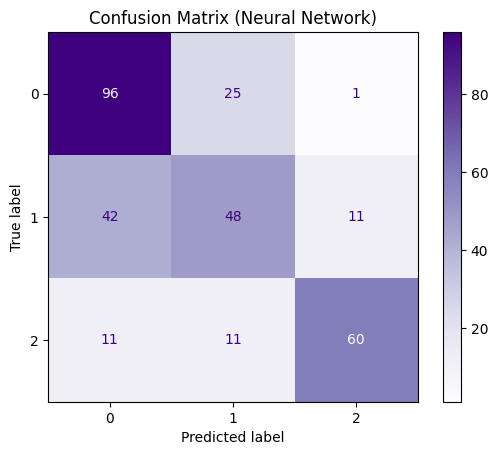

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

neuralnet = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=0)

neuralnet.fit(X_train, y_train)

y_pred_neuralnet = neuralnet.predict(X_test)

print("Accuracy (Neural Network):", accuracy_score(y_test,y_pred_neuralnet))
print("Classification Report (Neural Network):\n",classification_report(y_test, y_pred_neuralnet))
print("Confusion Matrix (Neural Network):\n",confusion_matrix(y_test, y_pred_neuralnet))
ConfusionMatrixDisplay.from_estimator(neuralnet, X_test, y_test, cmap="Purples")
plt.title("Confusion Matrix (Neural Network)")
plt.show()

*Naive Bayes*

Accuracy (Naive Bayes): 0.6098360655737705
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.57      0.95      0.71       122
           1       0.49      0.20      0.28       101
           2       0.82      0.61      0.70        82

    accuracy                           0.61       305
   macro avg       0.63      0.59      0.56       305
weighted avg       0.61      0.61      0.57       305

Confusion Matrix (Naive Bayes):
 [[116   6   0]
 [ 70  20  11]
 [ 17  15  50]]


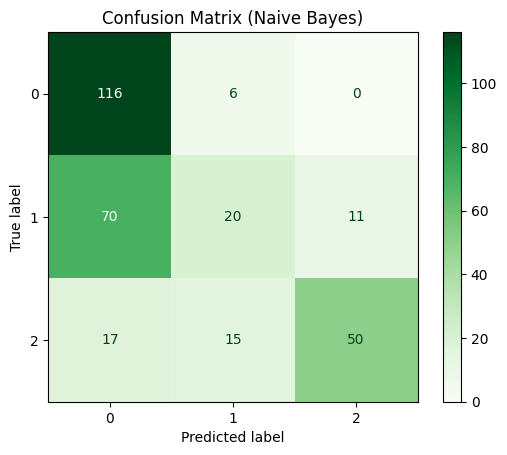

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

print("Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_gnb))
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_gnb))
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred_gnb))
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, cmap="Greens")
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()

*Logistic Regression*

Accuracy (Logistic Regression): 0.6426229508196721
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.63      0.89      0.74       122
           1       0.53      0.36      0.43       101
           2       0.80      0.62      0.70        82

    accuracy                           0.64       305
   macro avg       0.65      0.62      0.62       305
weighted avg       0.64      0.64      0.62       305

Confusion Matrix (Logistic Regression):
 [[109  13   0]
 [ 52  36  13]
 [ 12  19  51]]


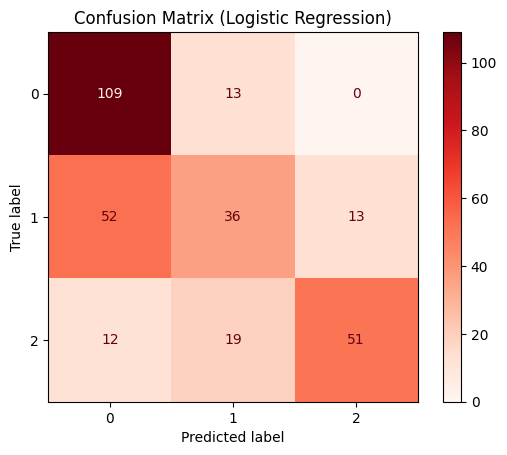

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logreg))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_logreg))
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, cmap="Reds")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

*Decision Tree*

Accuracy (Decision Tree): 0.8262295081967214
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       122
           1       0.78      0.79      0.78       101
           2       0.88      0.89      0.88        82

    accuracy                           0.83       305
   macro avg       0.83      0.83      0.83       305
weighted avg       0.83      0.83      0.83       305

Confusion Matrix (Decision Tree):
 [[99 19  4]
 [15 80  6]
 [ 5  4 73]]


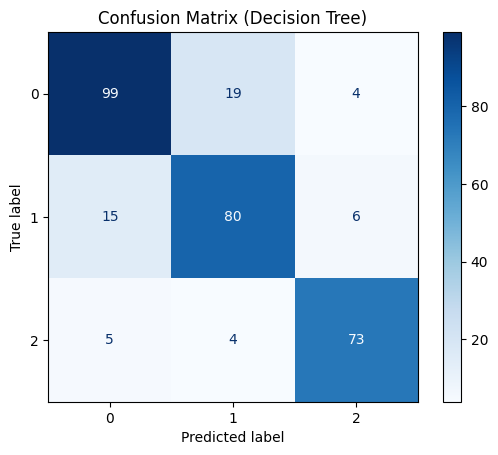

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

dt_classifier = DecisionTreeClassifier(criterion='entropy',random_state=1)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

## Model Comparison Analysis

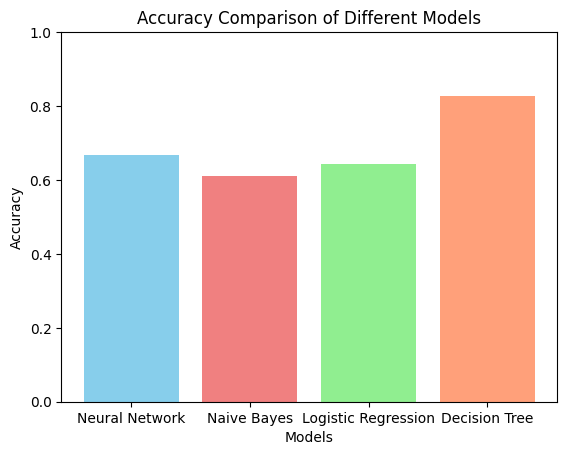

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

accuracy_scores = {
    'Neural Network': accuracy_score(y_test, y_pred_neuralnet),
    'Naive Bayes': accuracy_score(y_test, y_pred_gnb),
    'Logistic Regression': accuracy_score(y_test, y_pred_logreg),
    'Decision Tree': accuracy_score(y_test, y_pred_dt)
}

models = list(accuracy_scores.keys())
accuracy = list(accuracy_scores.values())

plt.bar(models, accuracy, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.title("Accuracy Comparison of Different Models")
plt.ylim(0, 1.0)
plt.show()

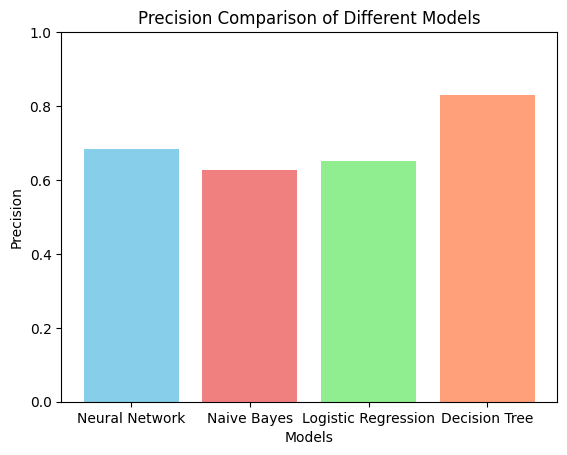

In [ ]:
import matplotlib.pyplot as plt

precision_scores = {
    'Neural Network': precision_score(y_test, y_pred_neuralnet, average='macro'),
    'Naive Bayes': precision_score(y_test, y_pred_gnb, average='macro'),
    'Logistic Regression': precision_score(y_test, y_pred_logreg, average='macro'),
    'Decision Tree': precision_score(y_test, y_pred_dt, average='macro')
}

models = list(precision_scores.keys())
precision = list(precision_scores.values())

plt.bar(models, precision, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Precision Comparison of Different Models")
plt.ylim(0, 1.0)
plt.show()

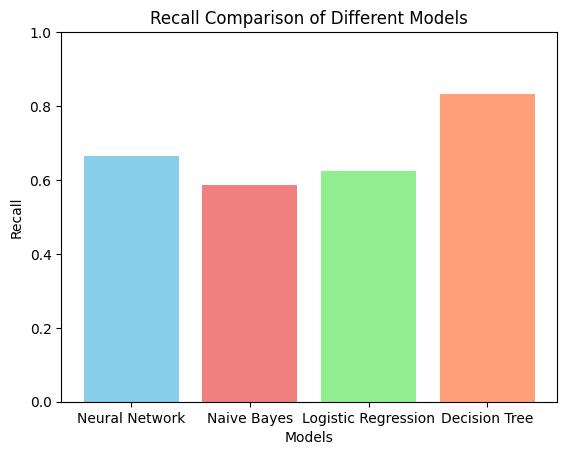

In [ ]:
import matplotlib.pyplot as plt
recall_scores = {
    'Neural Network': recall_score(y_test, y_pred_neuralnet, average='macro'),
    'Naive Bayes': recall_score(y_test, y_pred_gnb, average='macro'),
    'Logistic Regression': recall_score(y_test, y_pred_logreg, average='macro'),
    'Decision Tree': recall_score(y_test, y_pred_dt, average='macro')
}

models = list(recall_scores.keys())
recall = list(recall_scores.values())

plt.bar(models, recall, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Recall Comparison of Different Models")
plt.ylim(0, 1.0)
plt.show()